In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
def spot_check(item):
    print("""{}
    """.format(item))

In [3]:
# original df
chocolate = pd.read_csv('Chocolate Sales.csv')
print(chocolate.head())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [4]:
# clean
clean_choc = chocolate
clean_choc.columns = ['sales_rep', 'country','product','date','total','boxes']

In [5]:
# total amount
clean_choc['total'] = [x.replace('$','') for x in clean_choc['total']]
clean_choc['total'] = [x.replace(',','') for x in clean_choc['total']]
clean_choc['total'] = clean_choc['total'].astype(int)

In [6]:
# add month and year columns to split date
clean_choc['month'] = [x.split('-')[1] for x in clean_choc['date']]
clean_choc['month'] = pd.Categorical(clean_choc['month'], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'], ordered = True)

In [7]:
print(clean_choc['date'][clean_choc['date'].str.contains('Oct', na=False)])
# no data after Aug?

Series([], Name: date, dtype: object)


In [8]:
# adjust color to company preference
bar_color = 'limegreen'

In [9]:
clean_choc.to_csv('cleaned_chocolate_data.csv', index=False)

C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2820277164.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([x.replace(' ','\n') for x in top_ten['rep']])


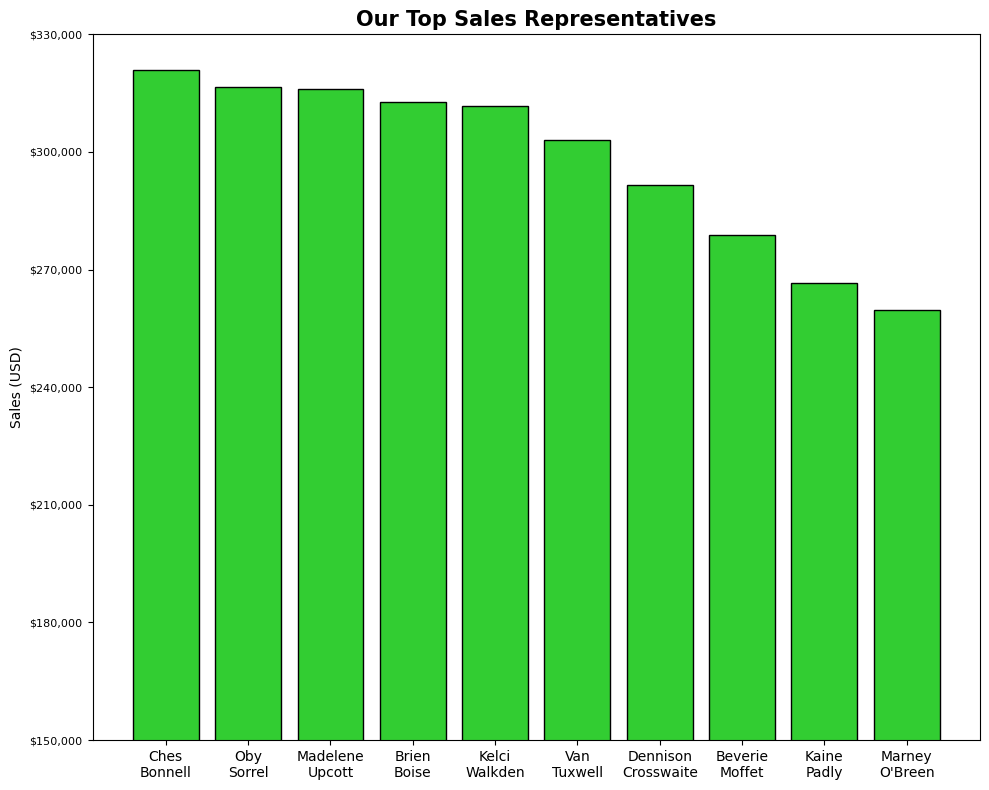

<Figure size 640x480 with 0 Axes>

In [10]:
# Employee motivation: finds the highest sellers

reps = clean_choc['sales_rep'].unique()
rep_totals = {}
for x in reps:
    rep_totals[x] = clean_choc['total'][clean_choc['sales_rep'] == x].sum()

rep_totals = pd.DataFrame(rep_totals, index= [1])
rep_totals = rep_totals.T.reset_index()
rep_totals.columns =['rep','sums']
rep_totals = rep_totals.sort_values(by ='sums', ascending = False).reset_index().drop(columns='index')


# plot all reps and top 10, but kept top 10. Have all else if we need it
plt.figure(figsize=(10,8))
# ax=plt.subplot(1,2,1)
# plt.bar(rep_totals['rep'],rep_totals['sums'], color=bar_color, edgecolor='black')
# ax.set_xticklabels(rep_totals['rep'], rotation=90)
# plt.xlabel('Sales Representative')
# plt.ylabel('Sales (USD)')
# plt.title('Total Sales for each Representative in 2022')

# top 10
top_ten = rep_totals[:10]

# ax1=plt.subplot(1,2,2)
ax1 = plt.subplot()
plt.bar(top_ten['rep'],top_ten['sums'], color=bar_color, edgecolor='black')
ax1.set_xticklabels([x.replace(' ','\n') for x in top_ten['rep']])
# plt.xlabel('Sales Representative')
plt.ylabel('Sales (USD)')
plt.ylim(150000,330001)
ax1.set_yticks(range(150000,350001,30000))
ylabels = []
for y in range(150000,350001,30000):
    if y > 0:
        ylabels.append('$'+str(round(y/1000))+',000')
    else:
        ylabels.append('$'+str(y))
ax1.set_yticklabels(ylabels, fontsize = 8)
plt.title('Our Top Sales Representatives', fontsize = 15, fontweight='bold')
plt.tight_layout()
plt.show()
plt.clf()

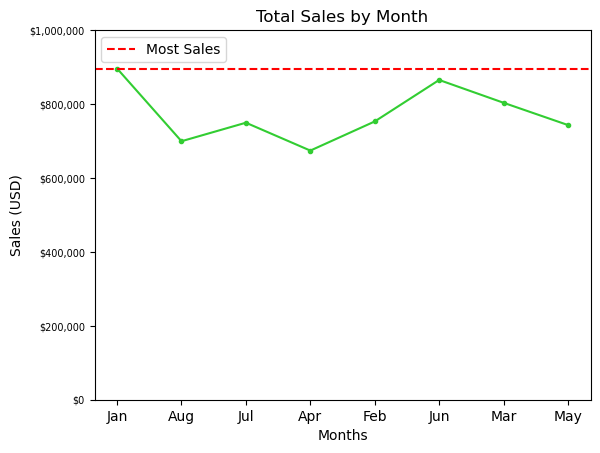

<Figure size 640x480 with 0 Axes>

In [11]:
# most lucrative months


ax = plt.subplot()
sums =  clean_choc.groupby('month').total.sum()
plt.plot(clean_choc['month'].unique(),sums, color = bar_color, marker='.')
r = range(0,1000001,200000)
ax.set_yticks(r)
ylabels = []
for y in r:
    if y == 0:
        ylabels.append('$'+str(0))
    elif y < 1000000:
        ylabels.append('$'+str(round(y/1000))+',000')
    else:
        ylabels.append('$'+str(round(y/1000000))+",000,000")
ax.set_yticklabels(ylabels, fontsize=7)

plt.axhline(sums.max(),linestyle='--',color='red', label='Most Sales')
plt.legend(loc='upper left')
plt.xlabel('Months')
plt.ylabel('Sales (USD)')
plt.title('Total Sales by Month')
plt.savefig('sales_over_time.jpg')
plt.show()
plt.clf()

Index(['month', 'UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'], dtype='object')


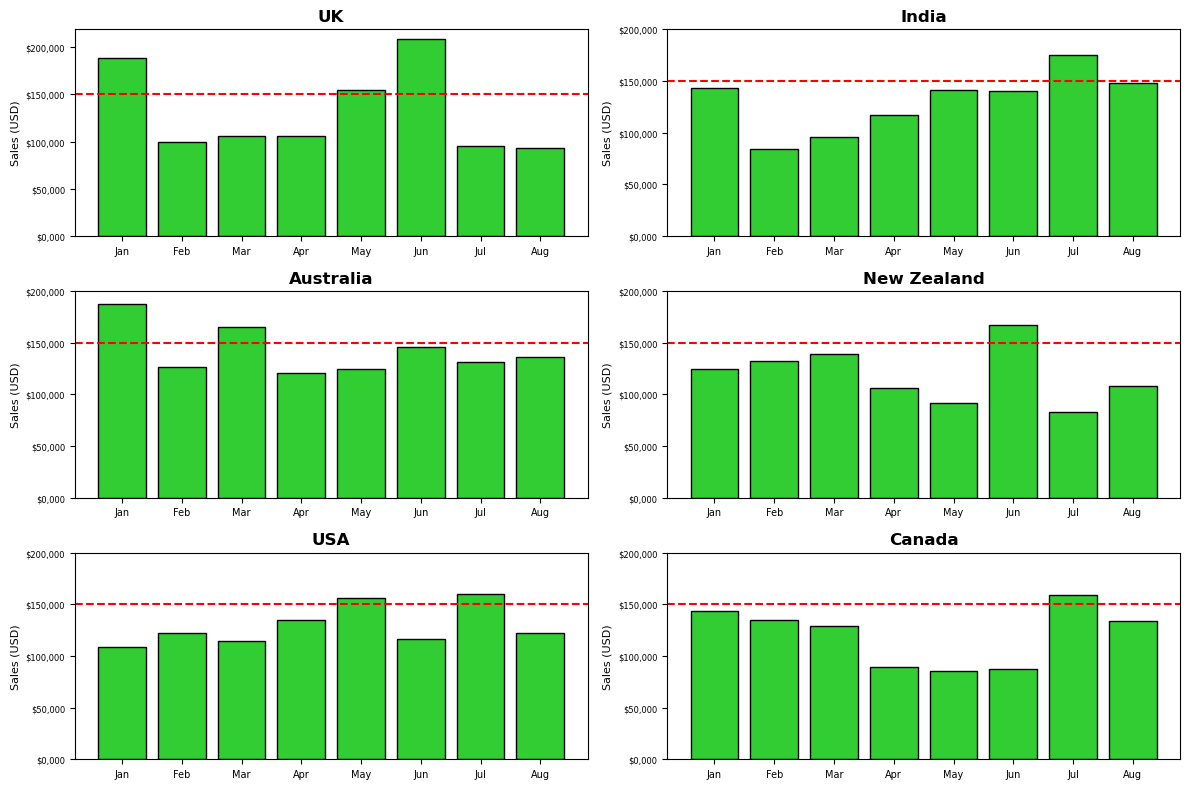

<Figure size 640x480 with 0 Axes>

In [12]:
# Asset Allocation: find the most lucrative months for the year by country
country_list = clean_choc['country'].unique()

def country_sales (data,country):
    df = data[['country', 'total', 'month']][data['country'] == country]
    df_sort = df.groupby('month').total.sum()
    return df_sort
uk_sales = country_sales(clean_choc,'UK')
country_dict = {}
for c in country_list:
    country_dict[c] = country_sales(clean_choc,c)
month_sales_country = pd.DataFrame(country_dict).reset_index()

print(month_sales_country.keys())

# total sales per country
count = 1
plt.figure(figsize=(12,8))
for x in country_list:
    ax = plt.subplot(3,2,count)
    plt.bar(month_sales_country['month'], month_sales_country[x], color=bar_color, edgecolor='black')
    ax.set_yticks(range(0,200001,50000))
    ax.set_yticklabels(['$'+str(round(i/1000))+',000' for i in range(0,200001,50000)], fontsize = 6)
    plt.ylabel('Sales (USD)', fontsize = 8)
    plt.axhline(150000, color='red', linestyle='--')
    plt.xticks(fontsize=7)
    if x == 'USA':
        plt.title(x, fontweight='bold')
    elif x == 'UK':
        plt.title(x, fontweight='bold')
    else:
        plt.title(x.title(), fontweight='bold')
    count +=1
plt.tight_layout()
plt.savefig('sales_country_months.jpg')
plt.show()
plt.clf()

C:\Users\davie\AppData\Local\Temp\ipykernel_12688\3319144061.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','1,000','2,000','3,000'],fontsize = 6)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\3319144061.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\3319144061.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','1,000','2,000','3,000'],fontsize = 6)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\3319144061.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\3319144061.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','1,000','2,000','3,000'],fontsize = 6)
C:\Use

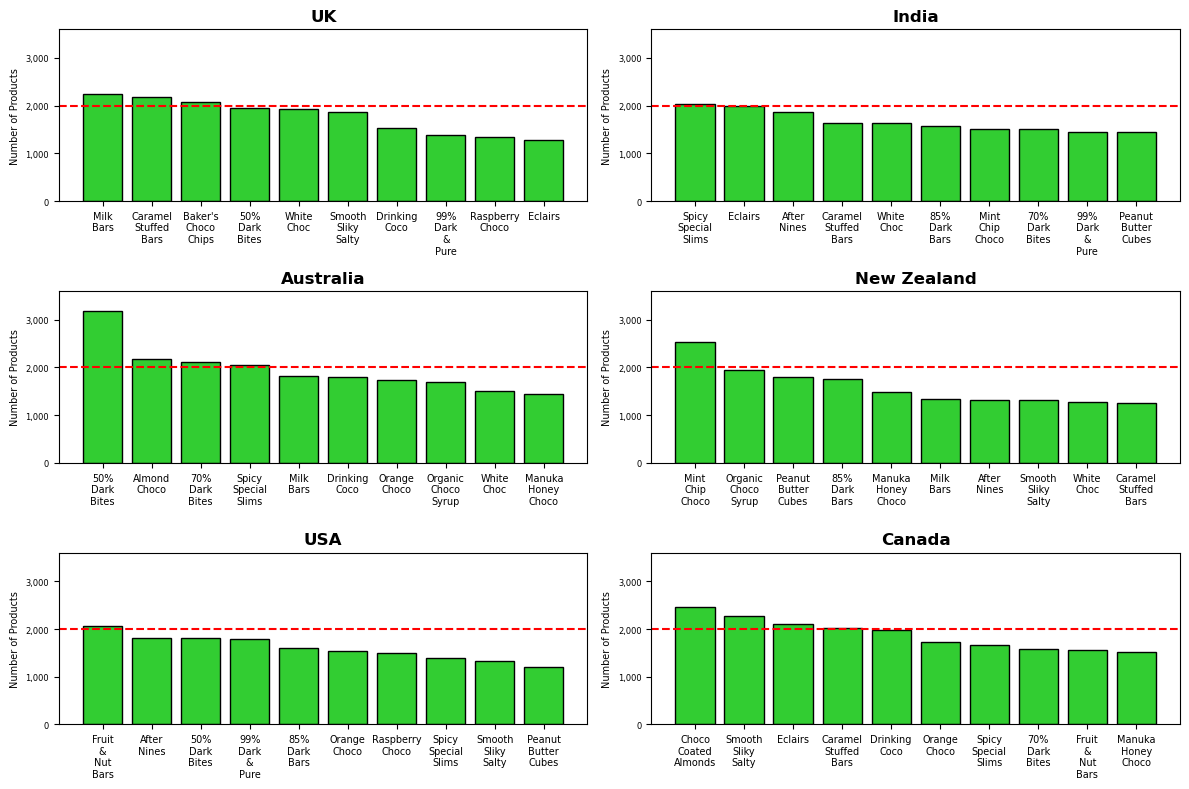

<Figure size 640x480 with 0 Axes>

In [13]:
# Asset Allocation: find the most lucrative months for the year by country
country_list = clean_choc['country'].unique()

def country_product (data,country):
    df = data[['country', 'product', 'boxes']][data['country'] == country]
    df_sort = df.groupby('product').boxes.sum()
    return df_sort
uk_sales = country_product(clean_choc,'UK')
country_dict = {}
for c in country_list:
    country_dict[c] = country_product(clean_choc,c)
month_product_country = pd.DataFrame(country_dict).reset_index()


# total sales per country
count = 1
plt.figure(figsize=(12,8))
for x in country_list:
    #Segregate data
    data = month_product_country[['product', x]]
    s_data = data.sort_values(by = x, ascending = False)
    s_data = s_data[:10]
    
    #start the plot
    ax = plt.subplot(3,2,count)
    plt.bar(s_data['product'], s_data[x], color=bar_color, edgecolor='black')
    plt.axhline(2000, color = 'red', linestyle='--')
    plt.ylim(0,3600)
    ax.set_yticklabels(['0','1,000','2,000','3,000'],fontsize = 6)
    
    #handle the x labels
    xlabels = []
    for i in s_data['product']:
        if i == 'Eclairs':
            xlabels.append(i)
        else:
            xlabels.append(i.replace(' ','\n'))
    ax.set_xticklabels(xlabels, fontsize=7)
    if x == 'USA':
        plt.title(x, fontweight='bold')
    elif x == 'UK':
        plt.title(x, fontweight='bold')
    else:
        plt.title(x.title(), fontweight='bold')
    
    #get the labels
    plt.ylabel('Number of Products', fontsize=7)
    count +=1
plt.tight_layout()
plt.savefig('popular_products_country.jpg')
plt.show()
plt.clf()

C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2950332661.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2950332661.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2950332661.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2950332661.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2950332661.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, fontsize=7)
C:\Users\davie\AppData\Local\Temp\ipykernel_12688\2950332661.py:25: UserWar

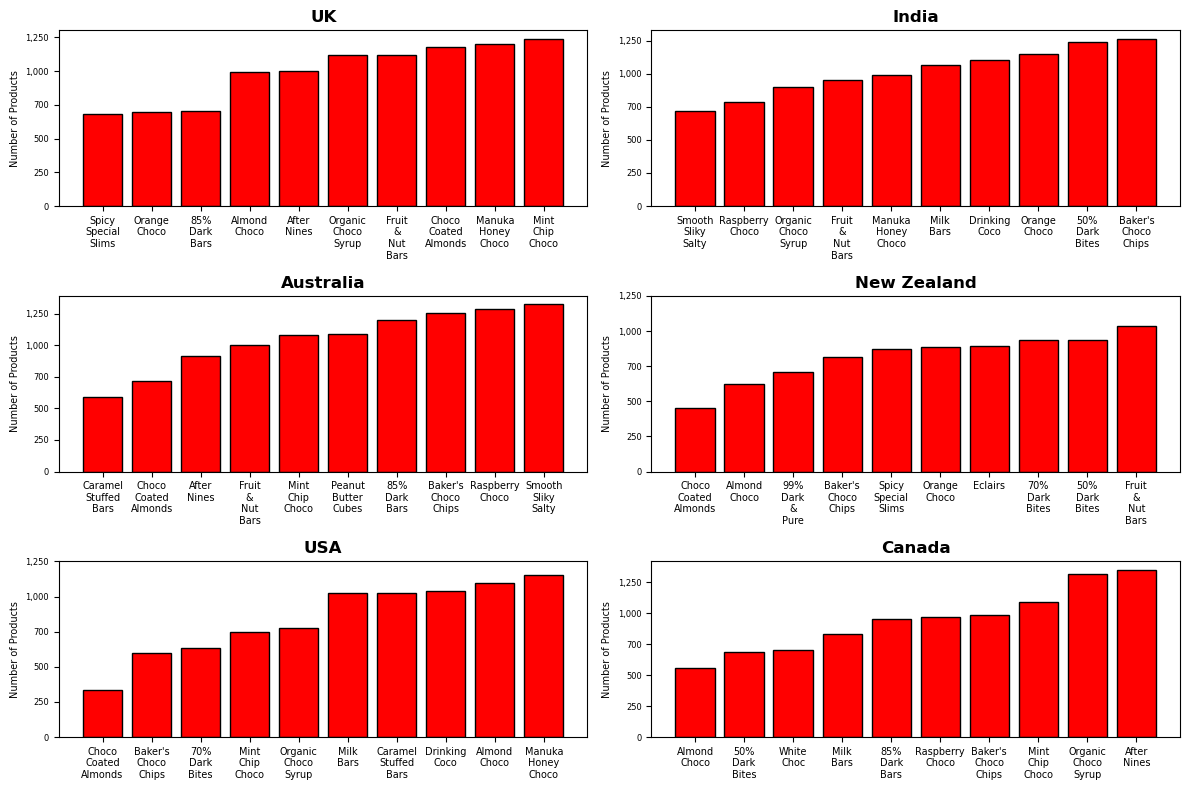

<Figure size 640x480 with 0 Axes>

In [14]:
# Asset Allocation: find the most lucrative months for the year by country
# total sales per country
count = 1
plt.figure(figsize=(12,8))
for x in country_list:
    #Segregate data
    data = month_product_country[['product', x]]
    s_data = data.sort_values(by = x, ascending = True)
    s_data = s_data[:10]
    
    #start the plot
    ax = plt.subplot(3,2,count)
    plt.bar(s_data['product'], s_data[x], color='red', edgecolor='black')
    ax.set_yticks(range(0,1251,250))
    ax.set_yticklabels(['0','250','500','700','1,000','1,250'], fontsize=6)
    # plt.yticks(range(0,19,3), fontsize = 7)
    
    #handle the x labels
    xlabels = []
    for i in s_data['product']:
        if i == 'Eclairs':
            xlabels.append(i)
        else:
            xlabels.append(i.replace(' ','\n'))
    ax.set_xticklabels(xlabels, fontsize=7)
    if x == 'USA':
        plt.title(x, fontweight='bold')
    elif x == 'UK':
        plt.title(x, fontweight='bold')
    else:
        plt.title(x.title(), fontweight='bold')
    
    #get the labels
    plt.ylabel('Number of Products', fontsize=7)
    count +=1
plt.tight_layout()
plt.savefig('unpopular_products_country.jpg')
plt.show()
plt.clf()

In [15]:
# get a table going to show the numbers for these visuals
df = month_product_country
df2 = month_sales_country
df2['month'] = df2['month'].astype(str)
table_dict = {}
table_dict['items'] = ['Most Products', 'Popular Product','Least Products', 'Unpopular Product','Highest Sales','Highest Sale Month', 'Lowest Sales', 'Lowest Sales Month']
for x in country_list:
    up = df[x].max()
    down = df[x].min()
    up_prod = df.loc[df[x] == up, 'product'].values[0]
    down_prod = df.loc[df[x] == down, 'product'].values[0]
    up_sales = df2[x].max()
    down_sales = df2[x].min()
    up_month = df2.loc[df2[x] == up_sales, 'month'].values[0]
    down_month = df2.loc[df2[x] == down_sales, 'month'].values[0]
    table_dict[x] = [up,up_prod,down,down_prod,up_sales,up_month,down_sales,down_month]

table_df = pd.DataFrame(table_dict)
print(table_df.keys())
print(table_df)

Index(['items', 'UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'], dtype='object')
                items                   UK                India  \
0       Most Products                 2251                 2037   
1     Popular Product            Milk Bars  Spicy Special Slims   
2      Least Products                  685                  722   
3   Unpopular Product  Spicy Special Slims   Smooth Sliky Salty   
4       Highest Sales               208621               175308   
5  Highest Sale Month                  Jun                  Jul   
6        Lowest Sales                93450                83888   
7  Lowest Sales Month                  Aug                  Feb   

              Australia           New Zealand                   USA  \
0                  3182                  2537                  2061   
1        50% Dark Bites       Mint Chip Choco      Fruit & Nut Bars   
2                   594                   455                   333   
3  Caramel Stuffed 

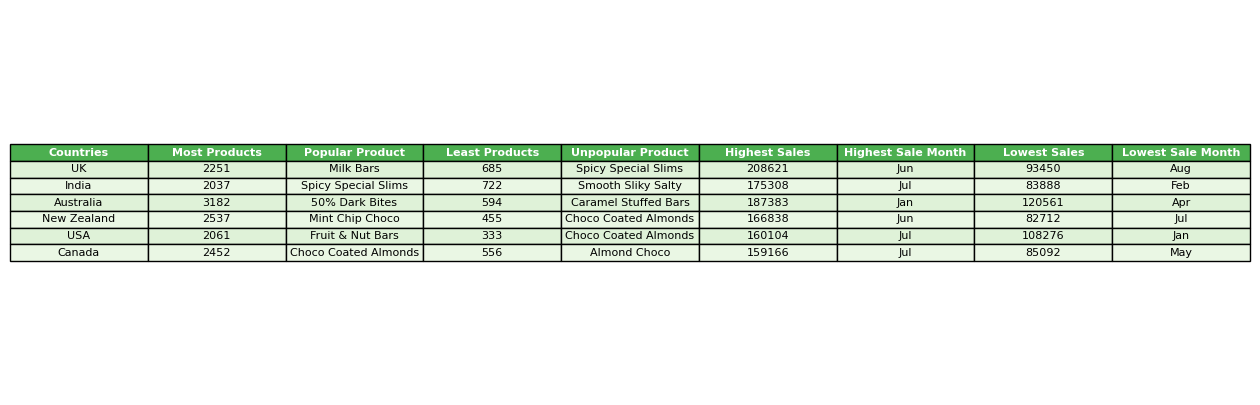

<Figure size 640x480 with 0 Axes>

In [16]:
df = table_df.drop(columns = 'items')
df = df.T.reset_index()

df.rename(columns= {'index':'Countries',0:'Most Products',1:'Popular Product',2:'Least Products',3:'Unpopular Product',
                   4:'Highest Sales',5:'Highest Sale Month',6:'Lowest Sales',7:'Lowest Sale Month'}, inplace=True)

def table(df,pict,width,height):
    # Define pastel green color palette
    header_color = "#4CAF50"  # Medium green
    row_colors = ["#DFF2D8", "#EAF7E4"]  # Light pastel greens

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(width, height))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)
    
    # Create and display the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Format header
    for (i, key) in enumerate(df.columns):
        table[0, i].set_facecolor(header_color)
        table[0, i].set_text_props(color="white", weight="bold")
    
    # Format banded rows
    for i in range(len(df)):
        for j in range(len(df.columns)):
            table[i + 1, j].set_facecolor(row_colors[i % 2])  # Alternating row colors
    
    # Adjust table properties
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    
    plt.savefig(pict)
    plt.show()
    plt.clf()

table(df,'chocolate_table.jpg', 16, 5)

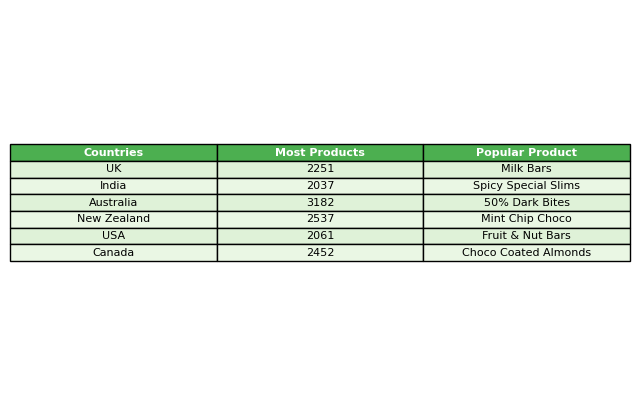

<Figure size 640x480 with 0 Axes>

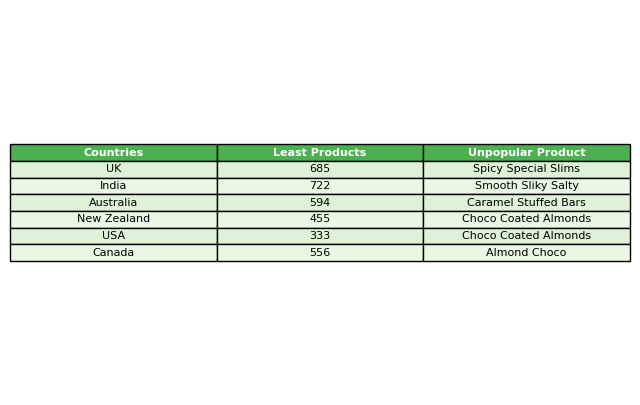

<Figure size 640x480 with 0 Axes>

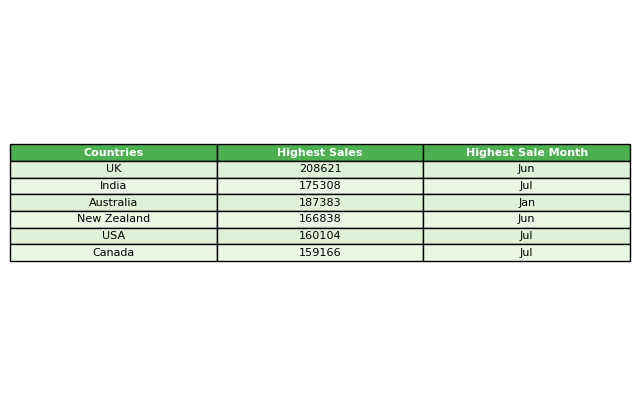

<Figure size 640x480 with 0 Axes>

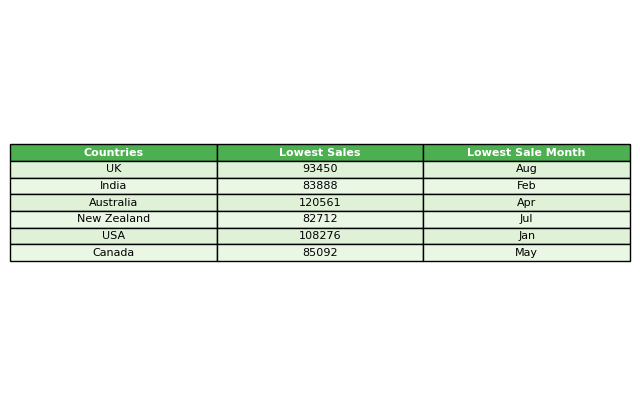

<Figure size 640x480 with 0 Axes>

In [17]:
width = 8
height = 5

master = df

df1 = master[['Countries','Most Products','Popular Product']]
table(df1,'popular_product.jpg',width,height)

df2 = master[['Countries','Least Products', 'Unpopular Product']]
table(df2,'unpopular_product.jpg',width,height)

df3 = master[['Countries','Highest Sales','Highest Sale Month']]
table(df3,'highest_month.jpg',width,height)

df4 = master[['Countries','Lowest Sales','Lowest Sale Month']]
table(df4,'lowest_month.jpg',width,height)